### Open all the provided csv files and get connected to the server

In [1]:
import csv
import pprint
## open all the provided csv files
data_StatisticalArea = list(csv.DictReader(open('StatisticalAreas.csv')))
data_Neighbourhoods = list(csv.DictReader(open('Neighbourhoods.csv')))
data_CensusStats = list(csv.DictReader(open('CensusStats.csv')))
data_BusinessStats = list(csv.DictReader(open('BusinessStats.csv')))
data_Pods = list(csv.DictReader(open('CarSharingPods.csv')))

In [2]:
import psycopg2
##connect to the server
def pgconnect():
    YOUR_UNIKEY = 'jlin0701'
    YOUR_PW     = '470345744'
    try: 
        conn = psycopg2.connect(host='soit-db-pro-1.ucc.usyd.edu.au',database='y18s1d2001_jlin0701',user='y18s1d2001_jlin0701',password='470345744')
        print('connected')
    except Exception as e:
        print("unable to connect to the database")
        print(e)
    return conn

In [3]:
def pgexec( conn, sqlcmd, args, msg, silent=False ):
   """ utility function to execute some SQL statement
       can take optional arguments to fill in (dictionary)
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False: 
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False: 
                print("db error: ")
                print(e)
   return retval

In [4]:
def pgquery( conn, sqlcmd, args, silent=False ):
   """ utility function to execute some SQL query statement
       can take optional arguments to fill in (dictionary)
       will print out on screen the result set of the query
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
                cur.execute(sqlcmd)
            else:
                cur.execute(sqlcmd, args)
            if silent == False:
                for record in cur:
                    print(record)
            retval = True
         except Exception as e:
            if silent == False:
                print("db read error: ")
                print(e)
   return retval

### Data Cleaning and Create Table for StatisticalArea, CensusStats and BusinessStats

In [5]:
## Data Cleaning

import numpy as np
DEFAULT_VALUE = np.nan

def clean(data, column_key, convert_function, default_value):
    special_values= {np.nan:0, '':0}
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

In [6]:
# clean the string data in StatisticalArea
# strip any leading or trailing spaces from the 'StatisticalArea' values
clean(data_StatisticalArea, 'area_name', str.strip, DEFAULT_VALUE)

# the following converts the three StatisticalArea columns to float or int values - or NaN
clean(data_StatisticalArea, 'area_id', int, DEFAULT_VALUE)
clean(data_StatisticalArea, 'parent_area_id', int, DEFAULT_VALUE)

In [63]:
# ready to create the StatisticalArea Table
conn = pgconnect()

pgexec (conn, "DROP TABLE IF EXISTS StatisticalArea",None,"Reset Table StatisticalArea")

StatisticalArea_schema = """CREATE TABLE StatisticalArea(
                          area_id INT NOT NULL,
                          area_name VARCHAR(50) NOT NULL,
                          parent_area_id  INT NOT NULL,
                          PRIMARY KEY (area_id)
                        )"""
pgexec (conn, StatisticalArea_schema, None, "Create Table StatisticalArea")


# Load the values into the table(sql) from data_StatisticalArea
insert_stmt = """INSERT INTO StatisticalArea(area_id,area_name,parent_area_id) VALUES (%(area_id)s,%(area_name)s,%(parent_area_id)s)"""
for row in data_StatisticalArea:
    pgexec (conn,insert_stmt,row,"row inserted")

connected
success: Reset Table StatisticalArea
success: Create Table StatisticalArea
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row 

In [64]:
# the following converts the three CensusStats columns to float or int values - or NaN
clean(data_CensusStats, 'area_id', int, DEFAULT_VALUE)
clean(data_CensusStats, 'median_annual_household_income', float, DEFAULT_VALUE)
clean(data_CensusStats, 'avg_monthly_rent', int, DEFAULT_VALUE)

In [65]:
# the following converts the 7 BusinessStats columns to float  values - or NaN
clean(data_BusinessStats, 'area_id', int, DEFAULT_VALUE)
clean(data_BusinessStats, 'num_businesses', float, DEFAULT_VALUE)
clean(data_BusinessStats, 'retail_trade', int, DEFAULT_VALUE)
clean(data_BusinessStats, 'accommodation_and_food_services', int, DEFAULT_VALUE)
clean(data_BusinessStats, 'health_care_and_social_assistance', int, DEFAULT_VALUE)
clean(data_BusinessStats, 'education_and_training', int, DEFAULT_VALUE)
clean(data_BusinessStats, 'arts_and_recreation_services', int, DEFAULT_VALUE)


In [66]:
# Create the BusinessStats table
pgexec(conn, "DROP TABLE IF EXISTS BusinessStats",None,"Reset Table BusinessStats")

BusinessStats_schema = """CREATE TABLE BusinessStats(
                          area_id INT NOT NULL,
                          n_businesses INT,
                          retail_trade INT,
                          accomodationFoodServices INT,
                          healthyCare_SocialAssistance INT,
                          education INT,
                          arts INT,
                          PRIMARY KEY (area_id)
                        );"""

pgexec(conn, BusinessStats_schema, None, "Create Table BusinessStats")

# Load the values from data_BusinessStats into the BussinessStats table
insert_stmt = """INSERT INTO BusinessStats(area_id,n_businesses,retail_trade,accomodationFoodServices,healthyCare_SocialAssistance,education,arts) 
            VALUES(%(area_id)s,%(num_businesses)s,%(retail_trade)s,%(accommodation_and_food_services)s,%(health_care_and_social_assistance)s,%(education_and_training)s,%(arts_and_recreation_services)s)"""
for row in data_BusinessStats:
    pgexec (conn,insert_stmt,row,"row inserted")

success: Reset Table BusinessStats
success: Create Table BusinessStats
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
succe

# Get the Connections between the CarPodsSharing and Neighbourhoods

In [70]:
## Scrapping address data from Google API

import time
def get_boundary(address):
    try:
        base_url = 'http://maps.googleapis.com/maps/api/geocode/json'
        my_params= {'address': address,'language':'en'}
        response = requests.get(base_url, params = my_params)
        results      = response.json()['results']
        if 'bounds' in results[0]['geometry']:
            nhood_bounds = results[0]['geometry']['bounds']
            return nhood_bounds
        else:
            return results[0]['geometry']['viewport']
    except IndexError as e:
        time.sleep(10)
        get_boundary(address)
    except KeyError as k:
        time.sleep(10)
        get_boundary(address)

In [69]:
import requests
import json

## Try to get the latitude and longitude for every Neighbourhoods via Google API
## and store the values of latitude and longitude in the data_Neighbourhoods 
for r in data_Neighbourhoods:
    address = r['area_name']
    address= address.strip().replace('\n', '')
    result = get_boundary(address)
    if result is not None:
        northeast_lat = float(result['northeast']['lat'])
        northeast_lng = float(result['northeast']['lng'])
        southwest_lat = float(result['southwest']['lat'])
        southwest_lng = float(result['southwest']['lng'])
        r.update({'ne_lat':northeast_lat})
        r.update({'ne_lng':northeast_lng})
        r.update({'sw_lat':southwest_lat})
        r.update({'sw_lng':southwest_lat})
        
    else:
        # Since the address is not detailed, give it a more specifed address
        address = address+" - Australia"
        result = get_boundary(address)
        if result is not None:
            northeast_lat = float(result['northeast']['lat'])
            northeast_lng = float(result['northeast']['lng'])
            southwest_lat = float(result['southwest']['lat'])
            southwest_lng = float(result['southwest']['lng'])
            r.update({'ne_lat':northeast_lat})
            r.update({'ne_lng':northeast_lng})
            r.update({'sw_lat':southwest_lat})
            r.update({'sw_lng':southwest_lat})
            t = ((southwest_lat, southwest_lng),(northeast_lat, northeast_lng))
        else:
            result = get_boundary(address)
            northeast_lat = float(result['northeast']['lat'])
            northeast_lng = float(result['northeast']['lng'])
            southwest_lat = float(result['southwest']['lat'])
            southwest_lng = float(result['southwest']['lng'])
            r.update({'ne_lat':northeast_lat})
            r.update({'ne_lng':northeast_lng})
            r.update({'sw_lat':southwest_lat})
            r.update({'sw_lng':southwest_lat})
            t = ((southwest_lat, southwest_lng),(northeast_lat, northeast_lng))

In [71]:
for row in data_Neighbourhoods:
    southwest_lat = row['sw_lat']
    southwest_lng = row['sw_lng']
    northeast_lat = row['ne_lat']
    northeast_lng = row['ne_lng']
    t = ((southwest_lat, southwest_lng),(northeast_lat, northeast_lng))
    row.update({'boundary':t})

In [72]:
# Check what heighbourhood the car pod is inside
# Copy the area_id of that neighbourhood into the data_Pods
for row in data_Pods:
    lat = float(row['latitude'])
    lng = float(row['longitude'])
    for r in data_Neighbourhoods:
        northeast_lat = r['ne_lat']
        northeast_lng = r['ne_lng']
        southwest_lat = r['sw_lat']
        southwest_lat = r['sw_lng']

        if lat >= southwest_lat and lat <= northeast_lat and lng <= northeast_lng and lng >= southwest_lng:
            row.update({'area_id':r['area_id']})

In [73]:
# Count how many car pods there are in each neighbourhood
# Store the number of car pods in that neighbourhoods into data_Neigbourhoods
for row in data_Neighbourhoods:
    area_id = row['area_id']
    count = 0
    for r in data_Pods:
        if 'area_id' in r:
            if area_id == r['area_id']:
                count += 1
            
    row.update({"num_pods" : count})
   

### Create the Pod table and load the data including the area_id into the table

In [74]:
# clean the data with string type in Pods
# strip any leading or trailing spaces from the 'Neighbourhoods' values
clean(data_Pods, 'name', str.strip, DEFAULT_VALUE)
clean(data_Pods, 'description', str.strip, DEFAULT_VALUE)


# the following converts the 4 Pods columns to float or int values - or NaN
clean(data_Pods, 'pod_id', int, DEFAULT_VALUE)
clean(data_Pods, 'num_cars', int, DEFAULT_VALUE)
clean(data_Pods, 'latitude', float, DEFAULT_VALUE)
clean(data_Pods, 'longitude', float, DEFAULT_VALUE)


In [84]:
# Create the Pods table
pgexec(conn, "DROP TABLE IF EXISTS Pods",None,"Reset Table Pods")

Pods_schema ="""CREATE TABLE Pods(
                  pod_id INT NOT NULL,
                  name VARCHAR(500) NOT NULL,
                  n_cars INT,
                  description VARCHAR(5000),
                  area_id INT,
                  location geometry,
                  PRIMARY KEY(pod_id)
                );"""

pgexec(conn, Pods_schema, None, "Create Table Pods")

# Loading data into the Pods table
insert_stmt = """INSERT INTO Pods(pod_id,name,n_cars,description, area_id, location) 
                VALUES(%(pod_id)s,%(name)s,%(num_cars)s,%(description)s, %(area_id)s, ST_MakePoint(%(latitude)s, %(longitude)s))"""
for row in data_Pods:
    pgexec (conn,insert_stmt,row,"row inserted")

success: Reset Table Pods
success: Create Table Pods
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'area_id'
success: row inserted
su

### find the train station(bonus)

In [90]:
# Extract the data of the list of train stations from html
import requests
from bs4 import BeautifulSoup
import json
import csv

page_html = requests.get("https://en.wikipedia.org/wiki/List_of_Sydney_Trains_railway_stations").text
page_content = BeautifulSoup(page_html, 'html5lib')
tables = page_content.find(id = 'bodyContent').find_all("table", {"class": "wikitable sortable"})

try:
    station_names = []
    data_table = page_content.find_all("tr")
    for row in data_table[2:]:
        station_name = row.a["href"].replace("/wiki/","").replace(",_Sydney","")
        station_names.append(station_name)
except TypeError as te:
    print(te)

'NoneType' object is not subscriptable


In [91]:
#write the data extracted from the web into the Stations.csv file
with open("Stations.csv","w") as output:
    fieldnames = ['station_id', 'stations']
    writer = csv.DictWriter(output, fieldnames=fieldnames)
    writer.writeheader()
    count = 0
    for name in station_names:
        writer.writerow({ 'station_id': count, 'stations': name})
        count += 1

In [92]:
def get_geolocation(address):
    result = get_boundary(address)
    if result is not None:
        return result
    if result is None:
        get_geolocation(address)

In [100]:
# for every station in the csv file, get the boundary of each train station
data_Stations = list(csv.DictReader(open('Stations.csv')))
for r in data_Stations:
    address = r['stations']
    address= address.strip().replace('\n', '')
    try:
        result = get_geolocation(address)
        northeast_lat = float(result['northeast']['lat'])
        northeast_lng = float(result['northeast']['lng'])
        southwest_lat = float(result['southwest']['lat'])
        southwest_lng = float(result['southwest']['lng'])
        r.update({'ne_lat':northeast_lat})
        r.update({'ne_lng':northeast_lng})
        r.update({'sw_lat':southwest_lat})
        r.update({'sw_lng':southwest_lat})

    except TypeError as te:
        try:
            result = get_geolocation(address)
            northeast_lat = float(result['northeast']['lat'])
            northeast_lng = float(result['northeast']['lng'])
            southwest_lat = float(result['southwest']['lat'])
            southwest_lng = float(result['southwest']['lng'])
            r.update({'ne_lat':northeast_lat})
            r.update({'ne_lng':northeast_lng})
            r.update({'sw_lat':southwest_lat})
            r.update({'sw_lng':southwest_lat})
        except TypeError as te2:
            result = get_geolocation(address)
            northeast_lat = float(result['northeast']['lat'])
            northeast_lng = float(result['northeast']['lng'])
            southwest_lat = float(result['southwest']['lat'])
            southwest_lng = float(result['southwest']['lng'])
            r.update({'ne_lat':northeast_lat})
            r.update({'ne_lng':northeast_lng})
            r.update({'sw_lat':southwest_lat})
            r.update({'sw_lng':southwest_lat})


In [101]:
# loop throgh the stations list and try to find which neighbourhood contains that train station
# store the area_id of the neighbourhood into the data_Stations
for row in data_Stations:
    ne_lat = float(row['ne_lat'])
    ne_lng = float(row['ne_lng'])
    sw_lat = float(row['sw_lat'])
    sw_lng = float(row['sw_lng'])
    for r in data_Neighbourhoods:
        northeast_lat = r['ne_lat']
        northeast_lng = r['ne_lng']
        southwest_lat = r['sw_lat']
        southwest_lng = r['sw_lng']

        if southwest_lat <= ne_lat and ne_lat <= northeast_lat: 
            if southwest_lng <= ne_lng and ne_lng <= northeast_lng:
                row.update({'area_id':r['area_id']})
        elif southwest_lat <= sw_lat and sw_lat <= northeast_lat: 
            if southwest_lng <= sw_lng and sw_lng <= northeast_lng:
                row.update({'area_id':r['area_id']})

In [102]:
# clean the data with string type in TrainStations
# strip any leading or trailing spaces from the 'TrainStations' values
clean(data_Stations, 'stations', str.strip, DEFAULT_VALUE)

# the following converts the 7 Neighbourhoods columns to float or int values - or NaN
clean(data_Stations, 'station_id', float, DEFAULT_VALUE)
clean(data_Stations, 'ne_lat', float, DEFAULT_VALUE)
clean(data_Stations, 'ne_lng', float, DEFAULT_VALUE)
clean(data_Stations, 'sw_lat', float, DEFAULT_VALUE)
clean(data_Stations, 'sw_lng', float, DEFAULT_VALUE)
try:
    clean(data_Stations, 'area_id', int, DEFAULT_VALUE)
except KeyError as ke:
    print("no corresponding area_id")

no corresponding area_id


In [107]:
# Create the TrainStations table

pgexec(conn, "DROP TABLE IF EXISTS TrainStations",None,"Reset Table TrainStations")

TrainStations_schema = """CREATE TABLE TrainStations(
                            station_id INT NOT NULL,
                            station_name VARCHAR(50) NOT NULL, 
                            area_id INT, 
                            sw_location geometry,
                            ne_location geometry,
                            PRIMARY KEY (station_id))
                            ;
                        """

pgexec (conn, TrainStations_schema, None, "Create Table TrainStations")

# load the data into the Neighbourhoods table
insert_stmt = """INSERT INTO TrainStations(station_id, station_name,area_id, sw_location, ne_location) 
                VALUES (%(station_id)s, %(stations)s,%(area_id)s, ST_MakePoint(%(sw_lat)s,%(sw_lng)s), ST_MakePoint(%(ne_lat)s, %(ne_lng)s))"""
for row in data_Stations:
    pgexec(conn,insert_stmt,row,"row inserted")

success: Reset Table TrainStations
success: Create Table TrainStations
success: row inserted
success: row inserted
success: row inserted
db error: 
'area_id'
success: row inserted
db error: 
'area_id'
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'area_id'
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'area_id'
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
db error: 
'area_id'
success: row inserted
success: row inserted
success: row inserted
db error: 
'area_id'
db error: 
'area_id'
db error: 
'area_id'
db error: 
'area_id'
db error: 
'area_id'
success: row inserted
db error: 
'are

In [109]:
# count how many train stations in that neighbourhood
# and store the number of train stations for each neighbourhood in data_Neighbourhood
for row in data_Neighbourhoods:
    area_id = row['area_id']
    count = 0
    for r in data_Stations:
        if 'area_id' in r:
            if area_id == r['area_id']:
                count += 1
            
    row.update({"num_stations" : count})
   

### Crteate the Neighbourhoods table and load the data from data_Neighbourhoods

In [110]:
# clean the data with string type in Neighbourhoods
# strip any leading or trailing spaces from the 'Neighbourhoods' values
clean(data_Neighbourhoods, 'area_name', str.strip, DEFAULT_VALUE)

# the following converts the 7 Neighbourhoods columns to float or int values - or NaN
clean(data_Neighbourhoods, 'area_id', int, DEFAULT_VALUE)
clean(data_Neighbourhoods, 'land_area', float, DEFAULT_VALUE)
clean(data_Neighbourhoods, 'population', int, DEFAULT_VALUE)
clean(data_Neighbourhoods, 'number_of_dwellings', int, DEFAULT_VALUE)
clean(data_Neighbourhoods, 'number_of_businesses', int, DEFAULT_VALUE)
clean(data_Neighbourhoods, 'num_pods', int, DEFAULT_VALUE)
clean(data_Neighbourhoods, 'num_stations', int, DEFAULT_VALUE)


In [111]:
# Create the Neighbourhoods table
pgexec(conn, "DROP TABLE IF EXISTS Neighbourhoods",None,"Reset Table Neighbourhoods")

Neighbourhoods_schema = """CREATE TABLE Neighbourhoods(
                            area_id INT NOT NULL, 
                            area_name VARCHAR(50) NOT NULL, 
                            land_area FLOAT NOT NULL, 
                            population INT, 
                            n_dwellings INT, 
                            n_businesses INT,
                            num_pods INT,
                            num_stations INT,
                            boundary geometry NOT NULL,
                            PRIMARY KEY (area_id));
                        """

pgexec (conn, Neighbourhoods_schema, None, "Create Table Neighbourhoods")

# load the data into the Neighbourhoods table
insert_stmt = """INSERT INTO Neighbourhoods(area_id,area_name,land_area,population, n_dwellings,n_businesses, num_pods, num_stations, boundary) 
                VALUES (%(area_id)s,%(area_name)s,%(land_area)s,%(population)s,%(number_of_dwellings)s,%(number_of_businesses)s, %(num_pods)s, %(num_stations)s, ST_MakeBox2D(ST_MakePoint(%(sw_lat)s, %(sw_lng)s), ST_MakePoint(%(ne_lat)s, %(ne_lng)s)))"""
for row in data_Neighbourhoods:
    pgexec(conn,insert_stmt,row,"row inserted")

success: Reset Table Neighbourhoods
success: Create Table Neighbourhoods
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
suc

## Create View

In [112]:
# Join the Neighbourhoods, BusinessStats, StatisticalArea, CensusStats, Pods and TrainStations table
join_all = """
            CREATE VIEW spatial_join_view
            AS
            SELECT * 
            FROM Neighbourhoods N
            natural join StatisticalArea SA
            natural join CensusStats CS
            natural join BusinessStats BS
            natural join Pods p
            natural join TrainStations TS
            where ST_Contains(N.boundary, p.location) and (ST_Contains(N.boundary, TS.ne_location) or ST_Contains(N.boundary, TS.sw_location))
            ;
        """
pgexec(conn, join_all, None, "join successfully")


success: join successfully


True

In [113]:
#Show the created view
import pandas
data_spatial = pandas.read_sql_query("SELECT * FROM spatial_join_view", conn)
data_spatial

,area_id,n_businesses,area_name,land_area,population,n_dwellings,num_pods,num_stations,boundary,parent_area_id,...,arts,pod_id,name,n_cars,description,location,station_id,station_name,sw_location,ne_location
0,118011347,1384,Woollahra,128.1,8246,1960,213,2,010300000001000000050000009CBF098508F240C09CBF...,11801,...,36,349,Kings Cross- Kellett Street,1,in a dedicated parking bay - generously provid...,010100000087F9F202ECEF40C0B003E78C28E76240,127,Redfern_railway_station,0101000000CE76CE9C60F240C0CE76CE9C60F240C0,0101000000A93AAC3408F240C0103BE1F468E66240
1,118011347,1384,Woollahra,128.1,8246,1960,213,2,010300000001000000050000009CBF098508F240C09CBF...,11801,...,36,349,Kings Cross- Kellett Street,1,in a dedicated parking bay - generously provid...,010100000087F9F202ECEF40C0B003E78C28E76240,34,Circular_Quay_railway_station,0101000000859883DC66EE40C0859883DC66EE40C0,0101000000605C61740EEE40C0A646D12DC9E66240
2,118021570,1402,Randwick - South,337.3,14238,3922,46,4,010300000001000000050000007288B83995F740C07288...,11802,...,32,294,Newtown South - Darley Street,1,"on Darley Street, near the corner of King Stre...",010100000095607138F3F340C069FCC22BC9E56240,150,Sydenham_railway_station,01010000003FADFDF8A6F540C03FADFDF8A6F540C0,0101000000CDCEFD309DF540C0FCAE63B76AE56240
3,118021570,1402,Randwick - South,337.3,14238,3922,46,4,010300000001000000050000007288B83995F740C07288...,11802,...,32,294,Newtown South - Darley Street,1,"on Darley Street, near the corner of King Stre...",010100000095607138F3F340C069FCC22BC9E56240,96,Mascot_railway_station,010100000084E969B256F640C084E969B256F640C0,010100000061AD474AFEF540C0D31B32A308E66240
4,118021570,1402,Randwick - South,337.3,14238,3922,46,4,010300000001000000050000007288B83995F740C07288...,11802,...,32,294,Newtown South - Darley Street,1,"on Darley Street, near the corner of King Stre...",010100000095607138F3F340C069FCC22BC9E56240,60,Green_Square_railway_station,0101000000B9BEA2F22BF440C0B9BEA2F22BF440C0,01010000009482808AD3F340C0D2029D7385E66240
5,118021570,1402,Randwick - South,337.3,14238,3922,46,4,010300000001000000050000007288B83995F740C07288...,11802,...,32,294,Newtown South - Darley Street,1,"on Darley Street, near the corner of King Stre...",010100000095607138F3F340C069FCC22BC9E56240,44,Dulwich_Hill_railway_station,01010000000D0F4FA1CAF440C00D0F4FA1CAF440C0,0101000000E8D22C3972F440C0D02EC8C08FE46240
6,118011347,1384,Woollahra,128.1,8246,1960,213,2,010300000001000000050000009CBF098508F240C09CBF...,11801,...,36,378,Paddington - Greens Road,1,in a dedicated bay on Greens Road just off Oxf...,0101000000F8FA5A971AF140C02DEBFEB110E76240,127,Redfern_railway_station,0101000000CE76CE9C60F240C0CE76CE9C60F240C0,0101000000A93AAC3408F240C0103BE1F468E66240
7,118011347,1384,Woollahra,128.1,8246,1960,213,2,010300000001000000050000009CBF098508F240C09CBF...,11801,...,36,378,Paddington - Greens Road,1,in a dedicated bay on Greens Road just off Oxf...,0101000000F8FA5A971AF140C02DEBFEB110E76240,34,Circular_Quay_railway_station,0101000000859883DC66EE40C0859883DC66EE40C0,0101000000605C61740EEE40C0A646D12DC9E66240
8,118021570,1402,Randwick - South,337.3,14238,3922,46,4,010300000001000000050000007288B83995F740C07288...,11802,...,32,196,Zetland - Gadigal Avenue,2,a dedicated bay outside the shops on Gadigal A...,010100000009FB761211F440C0857B65DEAAE66240,150,Sydenham_railway_station,01010000003FADFDF8A6F540C03FADFDF8A6F540C0,0101000000CDCEFD309DF540C0FCAE63B76AE56240
9,118021570,1402,Randwick - South,337.3,14238,3922,46,4,010300000001000000050000007288B83995F740C07288...,11802,...,32,196,Zetland - Gadigal Avenue,2,a dedicated bay outside the shops on Gadigal A...,010100000009FB761211F440C0857B65DEAAE66240,96,Mascot_railway_station,010100000084E969B256F640C084E969B256F640C0,010100000061AD474AFEF540C0D31B32A308E66240


In [114]:
# Only join the Neighbourhoods, BusinessStats, StatisticalArea and CensusStats table
join_all = """
            CREATE VIEW view_tables
            AS
            SELECT * 
            FROM Neighbourhoods N
            natural join BusinessStats BS
            natural join StatisticalArea SA
            natural join CensusStats CS
            ;
        """
pgexec(conn, join_all, None, "join successfully")


success: join successfully


True

In [32]:
#Show the created view
import pandas
data = pandas.read_sql_query("SELECT * FROM view_tables", conn)
data

,area_id,area_name,n_businesses,land_area,population,n_dwellings,num_pods,num_stations,boundary,retail_trade,accomodationfoodservices,healthycare_socialassistance,education,arts,parent_area_id,income,avg_rent
0,102011028,Avoca Beach - Copacabana,738,643.8,7590,2325,0,0,010300000001000000050000004673092C25BF40C04673...,35,33,62,9,20,10201,46996,1906
1,102011029,Box Head - MacMasters Beach,907,3208.6,10986,3847,0,0,010300000001000000050000009E5F94A0BFC140C09E5F...,42,21,43,11,29,10201,42621,1682
2,102011030,Calga - Kulnura,1102,76795.1,4841,1575,0,0,0103000000010000000500000029C709B88CB940C029C7...,42,17,11,18,23,10201,42105,1182
3,102011031,Erina - Green Point,1666,3379.3,14237,4450,0,0,0103000000010000000500000059D29B9B80B940C059D2...,143,68,164,22,15,10201,43481,1595
4,102011032,Gosford - Springfield,2126,1691.2,19385,6373,0,0,01030000000100000005000000E7806E79F6B740C0E780...,159,95,230,36,27,10201,45972,1382
5,102011033,Kariong,352,830.6,6540,1824,0,0,010300000001000000050000002ADD02AED0BE40C02ADD...,18,14,18,5,8,10201,47896,1649
6,102011034,Kincumber - Picketts Valley,479,1208.9,7428,1946,0,0,010300000001000000050000007DFCEFD297BB40C07DFC...,31,21,40,14,11,10201,41642,1397
7,102011035,Narara,292,770.2,6853,2006,0,0,0103000000010000000500000001C5234CACB440C001C5...,14,5,16,8,8,10201,46660,1512
8,102011036,Niagara Park - Lisarow,477,1673.2,8173,2345,0,0,0103000000010000000500000066C7FC9243B240C066C7...,22,17,27,10,3,10201,45762,1495
9,102011037,Point Clare - Koolewong,312,678.7,6281,2220,0,0,010300000001000000050000009D499BAA7BBD40C09D49...,10,9,20,5,7,10201,45966,1572


## walkability score calculation

In [115]:
import numpy
data['pop_density'] = data['population']/data['land_area']
data['dwelling_density'] = data['n_dwellings']/data['land_area']
data['transport_density'] = data['num_pods']/data['land_area']
data['trainStation_density'] = data['num_stations']/data['land_area']
data['service_balance'] = data['retail_trade']+data['accomodationfoodservices']+data['healthycare_socialassistance']+data['education']+data['arts']

data['pop_z_density'] = (data['pop_density']-data['pop_density'].mean())/data['pop_density'].std()
data['dwelling_z_density'] = (data['dwelling_density']-data['dwelling_density'].mean())/data['dwelling_density'].std()
data['transport_z_density'] = (data['transport_density']-data['transport_density'].mean())/data['transport_density'].std()
data['trainStation_z_density'] = (data['trainStation_density']-data['trainStation_density'].mean())/data['trainStation_density'].std()
data['service_z'] = (data['service_balance']-data['service_balance'].mean())/data['service_balance'].std()
data['walkability_score'] = data['pop_z_density']+data['dwelling_z_density']+data['transport_z_density']+data['service_z']+data['trainStation_z_density']


In [116]:
data.head()

,area_id,area_name,n_businesses,land_area,population,n_dwellings,num_pods,num_stations,boundary,retail_trade,...,dwelling_density,transport_density,trainStation_density,service_balance,pop_z_density,dwelling_z_density,transport_z_density,trainStation_z_density,service_z,walkability_score
0,102011028,Avoca Beach - Copacabana,738,643.8,7590,2325,0,0,010300000001000000050000004673092C25BF40C04673...,35,...,3.611370,0.0,0.0,159,-0.667128,-0.550210,-0.080708,-0.347179,-0.432262,-2.077487
1,102011029,Box Head - MacMasters Beach,907,3208.6,10986,3847,0,0,010300000001000000050000009E5F94A0BFC140C09E5F...,42,...,1.198965,0.0,0.0,146,-0.986052,-0.854885,-0.080708,-0.347179,-0.469316,-2.738140
2,102011030,Calga - Kulnura,1102,76795.1,4841,1575,0,0,0103000000010000000500000029C709B88CB940C029C7...,42,...,0.020509,0.0,0.0,111,-1.114182,-1.003718,-0.080708,-0.347179,-0.569078,-3.114865
3,102011031,Erina - Green Point,1666,3379.3,14237,4450,0,0,0103000000010000000500000059D29B9B80B940C059D2...,143,...,1.316841,0.0,0.0,412,-0.955969,-0.839998,-0.080708,-0.347179,0.288869,-1.934984
4,102011032,Gosford - Springfield,2126,1691.2,19385,6373,0,0,01030000000100000005000000E7806E79F6B740C0E780...,159,...,3.768330,0.0,0.0,547,-0.679598,-0.530387,-0.080708,-0.347179,0.673663,-0.964209


In [117]:
data_final = data.loc[:,['area_id','area_name','pop_z_density','dwelling_z_density','service_z','transport_z_density','trainStation_z_density','walkability_score']]
data_final.head()

,area_id,area_name,pop_z_density,dwelling_z_density,service_z,transport_z_density,trainStation_z_density,walkability_score
0,102011028,Avoca Beach - Copacabana,-0.667128,-0.550210,-0.432262,-0.080708,-0.347179,-2.077487
1,102011029,Box Head - MacMasters Beach,-0.986052,-0.854885,-0.469316,-0.080708,-0.347179,-2.738140
2,102011030,Calga - Kulnura,-1.114182,-1.003718,-0.569078,-0.080708,-0.347179,-3.114865
3,102011031,Erina - Green Point,-0.955969,-0.839998,0.288869,-0.080708,-0.347179,-1.934984
4,102011032,Gosford - Springfield,-0.679598,-0.530387,0.673663,-0.080708,-0.347179,-0.964209


In [118]:
import numpy
data["walkability_score"].describe()

count    3.120000e+02
mean     5.010237e-16
std      3.222577e+00
min     -3.436244e+00
25%     -2.028230e+00
50%     -7.347594e-01
75%      1.032102e+00
max      2.681239e+01
Name: walkability_score, dtype: float64

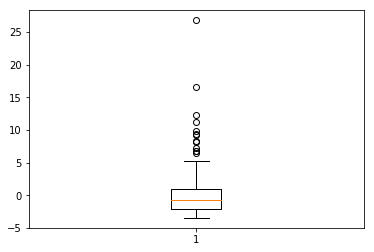

In [119]:
import matplotlib.pyplot as plt
plt.boxplot(data["walkability_score"])
plt.show()

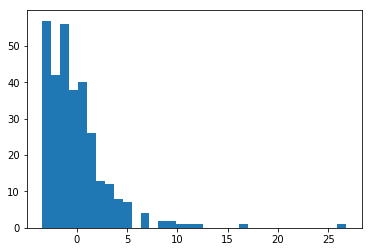

In [120]:
plt.hist(data["walkability_score"],bins='auto')
plt.show()

## Creating Index

In [121]:
#store the measure values alonbg with the area_id and area_name into the csv file

with open("index.csv","w") as output:
    fieldnames = ['area_id','area_name','pop_z_density','dwelling_z_density','service_z','transport_z_density','trainStation_z_density','walkability_score']
    writer = csv.DictWriter(output, fieldnames=fieldnames)
    writer.writeheader()
    #count = 0
    for count in range(0,len(data)):
        writer.writerow({'area_id':data['area_id'][count], 'area_name':data['area_name'][count], 'pop_z_density':data['pop_z_density'][count], 'dwelling_z_density': data['dwelling_z_density'][count], 'service_z': data['service_z'][count],'transport_z_density': data['transport_z_density'][count], 'trainStation_z_density': data['trainStation_z_density'][count], 'walkability_score': data['walkability_score'][count] })

In [122]:
data_Index = list(csv.DictReader(open('index.csv')))

In [123]:
# clean the data with string type in data_Index
# strip any leading or trailing spaces from the 'data_Index' values
clean(data_Index, 'area_name', str.strip, DEFAULT_VALUE)


# the following converts the 7 Pods columns to float or int values - or NaN
clean(data_Index, 'area_id', int, DEFAULT_VALUE)
clean(data_Index, 'pop_z_density', float, DEFAULT_VALUE)
clean(data_Index, 'dwelling_z_density', float, DEFAULT_VALUE)
clean(data_Index, 'service_z', float, DEFAULT_VALUE)
clean(data_Index, 'transport_z_density', float, DEFAULT_VALUE)
clean(data_Index, 'trainStation_z_density', float, DEFAULT_VALUE)
clean(data_Index, 'walkability_score', float, DEFAULT_VALUE)

In [125]:
# Create the Index_t table

pgexec(conn, "DROP TABLE IF EXISTS Index_t",None,"Reset Table Index_t")

Index_schema = """CREATE TABLE Index_t(
                            area_id INT NOT NULL, 
                            area_name VARCHAR(50) NOT NULL, 
                            pop_z_density FLOAT NOT NULL, 
                            dwelling_z_density INT NOT NULL, 
                            service_z FLOAT NOT NULL, 
                            transport_z_density FLOAT NOT NULL,
                            trainStation_z_density FLOAT NOT NULL,
                            walkability_score FLOAT NOT NULL,
                            PRIMARY KEY (area_id));
                        """

pgexec (conn, Index_schema, None, "Create Table Index_t")

# load the data into the Neighbourhoods table
insert_stmt = """INSERT INTO Index_t(area_id,area_name,pop_z_density,dwelling_z_density, service_z,transport_z_density, trainStation_z_density, walkability_score) 
                VALUES (%(area_id)s,%(area_name)s,%(pop_z_density)s,%(dwelling_z_density)s,%(service_z)s,%(transport_z_density)s, %(trainStation_z_density)s, %(walkability_score)s)"""
for row in data_Index:
    pgexec(conn,insert_stmt,row,"row inserted")

success: Reset Table Index_t
success: Create Table Index_t
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inse

In [126]:
## create index based on Index_t table
create_index = """create index index_measure on index_t(area_name);
                  cluster index_t using index_measure"""
pgexec(conn, create_index, None, "ok")

success: ok


True

In [127]:
#store the measure values alonbg with the area_id and area_name into the csv file

with open("index_spatial.csv","w") as output:
    fieldnames = ['area_id','n_businesses','area_name','land_area','population','n_dwellings','num_pods','num_stations','boundary', 'parent_area_id', 'income', 'avg_rent', 'retail_trade', 'accomodationfoodservices', 'healthycare_socialassistance', 'education', 'arts', 'pod_id', 'name', 'n_cars', 'description', 'location', 'station_id', 'station_name', 'sw_location', 'ne_location']
    writer = csv.DictWriter(output, fieldnames=fieldnames)
    writer.writeheader()
    for count in range(0,len(data_spatial)):
        writer.writerow({'area_id':data_spatial['area_id'][count], 'n_businesses':data_spatial['n_businesses'][count], 'area_name':data_spatial['area_name'][count], 'land_area': data_spatial['land_area'][count], 'population': data_spatial['population'][count],'n_dwellings': data_spatial['n_dwellings'][count], 'num_pods': data_spatial['num_pods'][count], 'num_stations': data_spatial['num_stations'][count], 'boundary': data_spatial['boundary'][count],'parent_area_id': data_spatial['parent_area_id'][count],'income': data_spatial['income'][count],'avg_rent': data_spatial['avg_rent'][count],'retail_trade': data_spatial['retail_trade'][count],'accomodationfoodservices': data_spatial['accomodationfoodservices'][count],'healthycare_socialassistance': data_spatial['healthycare_socialassistance'][count],'education': data_spatial['education'][count],'arts': data_spatial['arts'][count],'pod_id': data_spatial['pod_id'][count],'name': data_spatial['name'][count], 'n_cars': data_spatial['n_cars'][count], 'description': data_spatial['description'][count], 'location': data_spatial['location'][count], 'station_id': data_spatial['station_id'][count], 'station_name': data_spatial['station_name'][count], 'sw_location': data_spatial['sw_location'][count], 'ne_location': data_spatial['ne_location'][count], })
        

In [128]:
data_spatial_Index = list(csv.DictReader(open('index_spatial.csv')))

In [129]:
# Create the Index_spatial_t table

pgexec(conn, "DROP TABLE IF EXISTS Index_spatial_t",None,"Reset Table Index_spatial_t")

Index_spatial_schema = """CREATE TABLE Index_spatial_t(
                            area_id INT NOT NULL,
                            n_businesses INT,
                            area_name VARCHAR(50) NOT NULL, 
                            land_area FLOAT NOT NULL, 
                            population INT, 
                            n_dwellings INT, 
                            num_pods INT,
                            num_stations INT,
                            boundary GEOMETRY NOT NULL,
                            parent_area_id INT NOT NULL,
                            income INT,
                            avg_rent INT,
                            retail_trade INT,
                            accomodationfoodservices INT,
                            healthycare_socialassistance INT,
                            education INT,
                            arts INT,
                            pod_id INT,
                            name VARCHAR(500),
                            n_cars INT,
                            description VARCHAR(5000),
                            location GEOMETRY,
                            station_id INT,
                            station_name VARCHAR(500),
                            sw_location GEOMETRY,
                            ne_location GEOMETRY);
                        """

pgexec (conn, Index_spatial_schema, None, "Create Table Index_spatial_t")

# load the data into the Index_spatial_t table
insert_stmt = """INSERT INTO Index_spatial_t(area_id, n_businesses, area_name, land_area, population, n_dwellings, num_pods, num_stations, boundary, parent_area_id, income, avg_rent, retail_trade, accomodationfoodservices, healthycare_socialassistance, education, arts, pod_id, name, n_cars, description, location, station_id, station_name, sw_location, ne_location) 
                VALUES (%(area_id)s,%(n_businesses)s,%(area_name)s,%(land_area)s,%(population)s,%(n_dwellings)s, %(num_pods)s, %(num_stations)s, %(boundary)s, %(parent_area_id)s, %(income)s, %(avg_rent)s, %(retail_trade)s, %(accomodationfoodservices)s, %(healthycare_socialassistance)s, %(education)s, %(arts)s, %(pod_id)s, %(name)s, %(n_cars)s, %(description)s, %(location)s, %(station_id)s, %(station_name)s, %(sw_location)s, %(ne_location)s)"""
for row in data_spatial_Index:
    pgexec(conn,insert_stmt,row,"row inserted")

success: Reset Table Index_spatial_t
success: Create Table Index_spatial_t
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
s

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

In [130]:
## create spatial index based on Index_spatial_t table with boundary
create_spatial_index = """create index
                    on Index_spatial_t(boundary)"""
pgexec(conn, create_spatial_index, None, "ok")

success: ok


True

## Correlation

In [131]:
from scipy.stats.stats import pearsonr
print("correlation coefficient between houusehold median income and walkability score is " + str(pearsonr(data['income'], data_final["walkability_score"])[0]))

correlation coefficient between houusehold median income and walkability score is 0.263804647164


In [132]:
print("p-value of income-walikability score: "+str(pearsonr(data['income'], data_final["walkability_score"])[1]))

p-value of income-walikability score: 2.30139783477e-06


In [133]:
print("correlation coefficient between rent and walkability score is " + str(pearsonr(data['avg_rent'], data_final["walkability_score"])[0]))

correlation coefficient between rent and walkability score is 0.410324907201


In [134]:
print("p-value of rent-walikability score: "+str(pearsonr(data["avg_rent"], data_final["walkability_score"])[1]))

p-value of rent-walikability score: 4.22289845654e-14


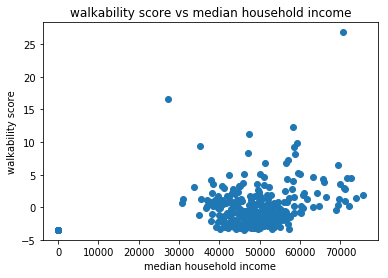

In [135]:
import matplotlib.pyplot as plt
plt.scatter(data["income"],data_final["walkability_score"])
plt.ylabel('walkability score')
plt.xlabel('median household income')
plt.title('walkability score vs median household income')
plt.show()

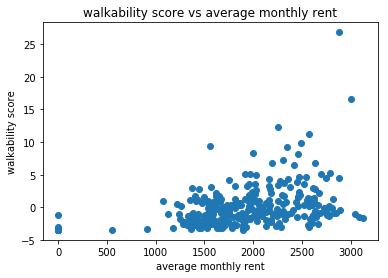

In [136]:
plt.scatter(data["avg_rent"],data_final["walkability_score"])
plt.ylabel('walkability score')
plt.xlabel('average monthly rent')
plt.title('walkability score vs average monthly rent')
plt.show()

In [141]:
data_result = pandas.read_sql_query("SELECT * FROM Index_t order by walkability_score desc", conn)
data_result.head()

,area_id,area_name,pop_z_density,dwelling_z_density,service_z,transport_z_density,trainstation_z_density,walkability_score
0,118011347,Woollahra,1.337514,1,0.060843,17.316662,7.171292,26.812386
1,117031337,Sydney - Haymarket - The Rocks,1.637255,2,13.725288,-0.080708,-0.347179,16.565157
2,117031333,Potts Point - Woolloomooloo,5.104751,7,1.035654,-0.080708,-0.347179,12.281314
3,117031334,Pyrmont - Ultimo,5.041288,5,1.158217,-0.080708,-0.347179,11.202037
4,117031329,Darlinghurst,4.405826,5,1.183870,-0.080708,-0.347179,9.923514


In [139]:
data_result.loc[:,["area_id","area_name","walkability_score"]].head()

,area_id,area_name,walkability_score
0,116021562,Acacia Gardens,-1.336118
1,119041375,Arncliffe - Bardwell Valley,1.001640
2,127011504,Ashcroft - Busby - Miller,0.956265
3,120031390,Ashfield,3.265703
4,121021403,Asquith - Mount Colah,-2.389468


In [151]:
for r in range(0, len(data_Index)):
    data_Index[r].update(data_StatisticalArea[r])

In [152]:
import pprint
for row in data_Index:
    pprint.pprint(row)

OrderedDict([('area_id', 1),
             ('area_name', 'New South Wales'),
             ('pop_z_density', -0.667127523506),
             ('dwelling_z_density', -0.550210389237),
             ('service_z', -0.432262311939),
             ('transport_z_density', -0.0807078397151),
             ('trainStation_z_density', -0.347179045082),
             ('walkability_score', -2.07748710948),
             ('parent_area_id', 0)])
OrderedDict([('area_id', 10),
             ('area_name', 'Greater Sydney'),
             ('pop_z_density', -0.986051541389),
             ('dwelling_z_density', -0.85488511302),
             ('service_z', -0.46931649947),
             ('transport_z_density', -0.0807078397151),
             ('trainStation_z_density', -0.347179045082),
             ('walkability_score', -2.73814003868),
             ('parent_area_id', 1)])
OrderedDict([('area_id', 11),
             ('area_name', 'Rest of NSW'),
             ('pop_z_density', -1.11418173746),
             ('dwelling_z_d

             ('pop_z_density', 0.583283359097),
             ('dwelling_z_density', 0.493060301208),
             ('service_z', -0.0332172154495),
             ('transport_z_density', -0.0807078397151),
             ('trainStation_z_density', -0.347179045082),
             ('walkability_score', 0.615239560059),
             ('parent_area_id', 11603)])
OrderedDict([('area_id', 117),
             ('area_name', 'Sydney - City and Inner South'),
             ('pop_z_density', 1.50908379714),
             ('dwelling_z_density', 1.32134751523),
             ('service_z', 0.744920722705),
             ('transport_z_density', -0.0807078397151),
             ('trainStation_z_density', 0.660686350883),
             ('walkability_score', 4.15533054625),
             ('parent_area_id', 10)])
OrderedDict([('area_id', 11701),
             ('area_name', 'Botany'),
             ('pop_z_density', 0.0552544296369),
             ('dwelling_z_density', 0.0787940337191),
             ('service_z', 0.334474

             ('trainStation_z_density', 0.00192787545728),
             ('walkability_score', -1.88432437948),
             ('parent_area_id', 12003)])
OrderedDict([('area_id', 121),
             ('area_name', 'Sydney - North Sydney and Hornsby'),
             ('pop_z_density', -0.21495562891),
             ('dwelling_z_density', -0.192565232244),
             ('service_z', -0.395208124408),
             ('transport_z_density', -0.0807078397151),
             ('trainStation_z_density', -0.347179045082),
             ('walkability_score', -1.23061587036),
             ('parent_area_id', 10)])
OrderedDict([('area_id', 12101),
             ('area_name', 'Chatswood - Lane Cove'),
             ('pop_z_density', -0.369748049883),
             ('dwelling_z_density', -0.231704556613),
             ('service_z', -0.361004258995),
             ('transport_z_density', -0.0807078397151),
             ('trainStation_z_density', -0.347179045082),
             ('walkability_score', -1.39034375029),
 

In [153]:
import numpy
import pandas as pd
df = pd.DataFrame.from_dict(data_Index)
df.head()

,area_id,area_name,pop_z_density,dwelling_z_density,service_z,transport_z_density,trainStation_z_density,walkability_score,parent_area_id
0,1,New South Wales,-0.667128,-0.550210,-0.432262,-0.080708,-0.347179,-2.077487,0
1,10,Greater Sydney,-0.986052,-0.854885,-0.469316,-0.080708,-0.347179,-2.738140,1
2,11,Rest of NSW,-1.114182,-1.003718,-0.569078,-0.080708,-0.347179,-3.114865,1
3,2,Victoria,-0.955969,-0.839998,0.288869,-0.080708,-0.347179,-1.934984,0
4,20,Greater Melbourne,-0.679598,-0.530387,0.673663,-0.080708,-0.347179,-0.964209,2


In [154]:
data_Index

[OrderedDict([('area_id', 1),
              ('area_name', 'New South Wales'),
              ('pop_z_density', -0.667127523506),
              ('dwelling_z_density', -0.550210389237),
              ('service_z', -0.432262311939),
              ('transport_z_density', -0.0807078397151),
              ('trainStation_z_density', -0.347179045082),
              ('walkability_score', -2.07748710948),
              ('parent_area_id', 0)]),
 OrderedDict([('area_id', 10),
              ('area_name', 'Greater Sydney'),
              ('pop_z_density', -0.986051541389),
              ('dwelling_z_density', -0.85488511302),
              ('service_z', -0.46931649947),
              ('transport_z_density', -0.0807078397151),
              ('trainStation_z_density', -0.347179045082),
              ('walkability_score', -2.73814003868),
              ('parent_area_id', 1)]),
 OrderedDict([('area_id', 11),
              ('area_name', 'Rest of NSW'),
              ('pop_z_density', -1.11418173746),
    

In [155]:
p_list = list(df.groupby(['parent_area_id']))
mean_list = df.groupby(['parent_area_id'])['walkability_score'].agg('mean')
dic = {'parent_area_id': p_list, 'mean': mean_list}

In [156]:
dic = {}

for r in data_Index:
    dic[r['parent_area_id']]= r['walkability_score'] + dic.get(r['parent_area_id'], 0)
     
length = len(dic.keys())
for key in dic:
    dic[key]=dic[key]/length
        
key_list = []
mean_list = []
for k in dic:
    key_list.append(k)
    mean_list.append(dic[k])
    
dic_new = {'parent_id': key_list, 'mean': mean_list}

import pandas as pd
df2 = pd.DataFrame(dic_new)
df2.head()

,mean,parent_id
0,-0.374422,0
1,-0.099203,1
2,-0.061752,2
3,-0.092721,3
4,-0.056892,4


In [162]:
df2.sort_values(by= ["mean"], ascending=0)

,mean,parent_id
16,0.905824,11501
21,0.639122,11601
27,0.526328,11703
17,0.403099,11502
25,0.309074,11701
29,0.287188,11801
18,0.204506,11503
15,0.127258,115
22,0.121039,11602
19,0.112003,11504


In [163]:
df2.sort_values(by= ["mean"], ascending=0)

,mean,parent_id
16,0.905824,11501
21,0.639122,11601
27,0.526328,11703
17,0.403099,11502
25,0.309074,11701
29,0.287188,11801
18,0.204506,11503
15,0.127258,115
22,0.121039,11602
19,0.112003,11504
